# Project: Investigate a Dataset - No-show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The objective of this investigation is to determine what factors may be helpful in predicting whether or not a patient would miss their scheduled hospital appointment. For this investigation, we used a dataset from [Kaggle](https://www.kaggle.com/datasets/joniarroba/noshowappointments) that collects information from over 100k medical appointments in Brazil. <br>
The dataset contains 11 column: AppointmentID, Gender,	ScheduledDay,	AppointmentDay,	Age,	Neighbourhood,	Scholarship,	Hipertension,	Diabetes,	Alcoholism,	Handcap,	SMS_received,	No-Show.
The dependent variable in this dataset is the 'no-show' column, and we will be trying to find out how the other variables affect it.<br> In this analysis, I am going to highlight some of the possible factors that may determine whether or not a patient will show up for their appointment, and carry out exploratory data analysis on each highlighted variable to discover any correlations between that variable and the dependent variable: no-show.

***

## Let's begin our anaysis by importing all the packages that would aid in the exploration and visualization of our dataset.

In [1]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#some visualization settings
%matplotlib inline
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data wrangling

***

Now, it's time to extract the data from from the ..... csv dataset, and scan through a cross-section of it to have a vague understanding of what we're working with.

In [2]:
#loading the dataset
no_show = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
no_show.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Some questions 

What factors are
important for us to
know in order to
predict if a patient will
show up for their
scheduled
appointment?
* Does age help in the prediction of whether or not patients will show up for their appointments?
* Does gender help in the prediction of whether or not patients will show up for their appointments?
* Do chronic medical conditiond determine whether or not patients will show up for their appointments?
* Do patients who receive scholarships tend to miss their appointments more than those who do not?

To understand this dataframe, we need to get a brief desciption of it. In the suceeding code cell, I'll be taking a look at the summary of the various features of our dataframe to shed some insight on that.

In [3]:
#no_show.info()

We can clearly deduce that there are 110527 rows(entries) and 14 columns, all with no missing values. For clarity sake, I'll go ahead and verify this with a simple one line summary in the code below, we can never be too safe!

In [4]:
no_show.shape

(110527, 14)

In [5]:
no_show.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

Amazing! Now,let's get statistical summary on all non-object value columns in our dataframe.

In [6]:
no_show.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


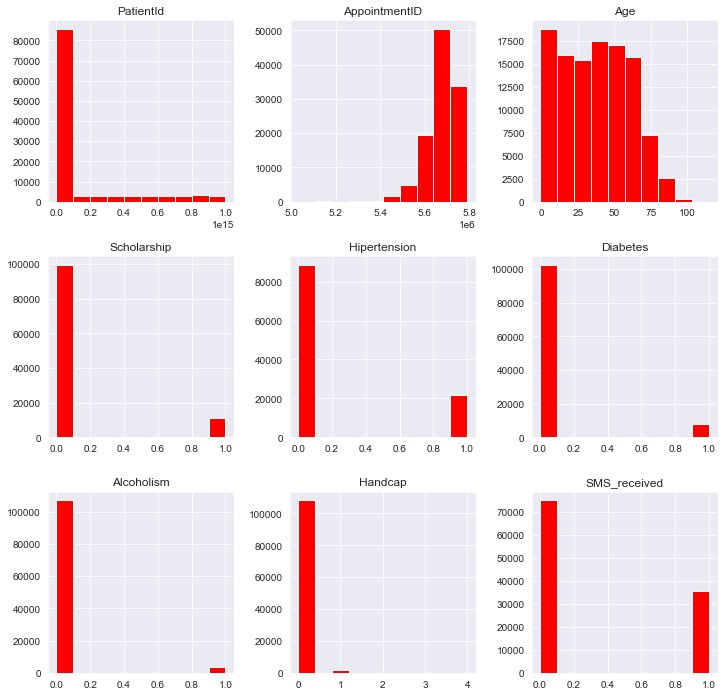

In [7]:
#histogram of dataframe
no_show.hist(figsize=(12, 12), color="r");

### Cleaning the dataFrame

In this section, I will be checking for any null values, unconventional column naming conventions, outliers, and things that can negatively affect the quality of my analysis.

***

To prevent casing errors, and for uniformity sake, I decided to convert the titles of all the columns to lowercase.

In [8]:
#converting titles to lowercase, and renaming the no-show column to follow the python naming convention
no_show.columns = no_show.columns.str.lower()
no_show.rename(columns={'no-show':'no_show'}, inplace=True)
#fixing the spelling error in the 'hipertension' and 'handcap' columns
no_show.rename(columns={'hipertension':'hypertension'}, inplace=True)
no_show.rename(columns={'handcap':'handicap'}, inplace=True)

One column seems to have some off values,the age column. In the code cell below, I'll check to see how many patients were younger than 0, because a person cannot be a negative number of years old. I'll then remove any such rows as they will most likely alter the quality of my analysis moving forward. Based on the metadata of this dataset, there is no information on the whether or not the patients were dependants, so I won't be discarding any rows that have an age value of 0, as they could have been babies carried to their appointments by their guardians. 

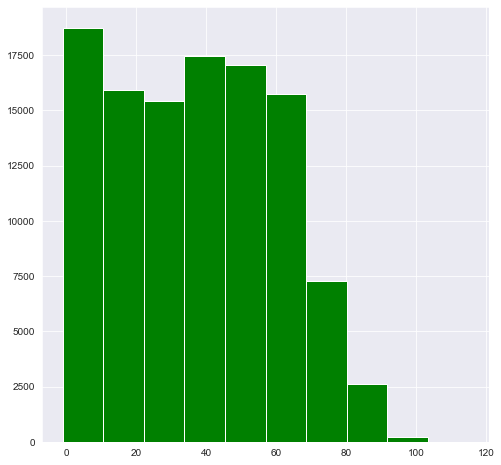

In [9]:
#getting an idea of the distribution of ages within the age column
no_show['age'].hist( figsize=(8, 8), color="g");

In [10]:
#getting all rows that have the age value set to any number less than 0
no_show.query('age < 0')

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [11]:
#dropping that row
no_show.drop(index= no_show.index[99832], inplace=True)
#confirming what we did
no_show.query('age < 0')


,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show


In [12]:
#checking for duplicate rows
no_show.duplicated().sum()

0

There are no duplicate rows in this dataset, hence no filing or dropping of rows is required.

In [13]:
#confirming our changes
no_show.head(3)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [14]:
#getting the total number of rows in the dataFrame
no_show.shape[0]

110526

In [15]:
no_show['appointmentday'].duplicated().sum()

110499

In [16]:
no_show['scheduledday'].duplicated().sum()

6978

In [17]:
(no_show['appointmentday'].duplicated().sum()) / len(no_show) * 100

99.97557135877531

In [18]:
(no_show['scheduledday'].duplicated().sum()) / len(no_show) * 100

6.313446609847456

### Now, let's drop some irrelevant columns to reduce the noise in our dataFrame.

The 'appointmentid' and 'patientid' columns certainly do not provide us with any useful information that directly or indirectly affects the no-show status of the patients in this dataset. The 'neighbourhood' column should also be dropped  because it's the location of the hospital and not where the patients live, hence, that information doesn't give us much insight as to whether of not there is a relationship between the neighbourhood of the patients and them showing up to their appointments. The 'appointmentday' and 'scheduldedday' columns cannot provide us with any statistical  All aforementioned columns are hence dropped.

In [19]:
no_show.drop(['appointmentid', 'patientid', 'neighbourhood', 'scheduledday', 'appointmentday'], axis=1, inplace=True)

In [20]:
#confirming that those columns have indeed been dropped.
no_show.head(3)

,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,62,0,1,0,0,0,0,No
1,M,56,0,0,0,0,0,0,No
2,F,62,0,0,0,0,0,0,No


In [21]:
#broadly checking if our variables are quantitative or categorical
no_show.nunique()

gender            2
age             103
scholarship       2
hypertension      2
diabetes          2
alcoholism        2
handicap          5
sms_received      2
no_show           2
dtype: int64

The handicap column has 5 unique values instead of 2, as it is a categorical variable. 

In [22]:
#exploring the handicap column
no_show.query('handicap > 1')

,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
946,M,94,0,1,1,0,2,1,No
1665,M,64,0,1,0,1,2,1,No
1666,M,64,0,1,0,1,2,0,No
2071,M,64,0,1,0,1,2,0,No
2091,F,11,0,0,0,0,2,0,No
...,...,...,...,...,...,...,...,...,...
108376,F,44,0,1,1,0,2,1,No
109484,M,64,0,1,1,0,2,0,No
109733,F,34,0,0,0,0,2,1,No
109975,M,39,1,0,0,0,2,1,No


In [23]:
#dropping those rows
no_show.drop(no_show.index[no_show['handicap'] > 1], inplace=True)
#confirming what we just did
no_show.query('handicap > 1')


,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show


In [24]:
no_show.head()

,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,62,0,1,0,0,0,0,No
1,M,56,0,0,0,0,0,0,No
2,F,62,0,0,0,0,0,0,No
3,F,8,0,0,0,0,0,0,No
4,F,56,0,1,1,0,0,0,No


In [25]:
#confirming that the datatypes of all relevant columns are appropriate.
no_show.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110327 entries, 0 to 110526
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   gender        110327 non-null  object
 1   age           110327 non-null  int64 
 2   scholarship   110327 non-null  int64 
 3   hypertension  110327 non-null  int64 
 4   diabetes      110327 non-null  int64 
 5   alcoholism    110327 non-null  int64 
 6   handicap      110327 non-null  int64 
 7   sms_received  110327 non-null  int64 
 8   no_show       110327 non-null  object
dtypes: int64(7), object(2)
memory usage: 8.4+ MB


<a id='eda'></a>
# Exploratory data analysis

***

### Henceforth, I'll be checking the relationship between column to uncover any trends/patterns that may enable us to be able to predict patients that may miss thier appointments in the future.

The dependent column in this dataframe is the 'no-show' column, and I'd like to uncover any relationships between it and some of the non-dependent columns. 

### Let's begin by finding out the relationship between the 'gender' and the 'no_show' columns

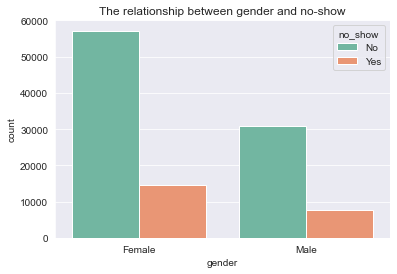

In [26]:
#Starting off with the visualization of the relationship between the 'gender' and the 'no_show' columns
ax = sns.countplot(x=no_show['gender'], hue=no_show['no_show'], palette='Set2')
ax.set_title('The relationship between gender and no-show')
xlabels=['Female', 'Male']
ax.set_xticklabels(xlabels)
plt.show()

There appears to be way more women than men in this dataset, let's delve deeper into the distribution by finding the proportions of each gender that showed up or didn't show up for their appointments. 

In [27]:
# getting the total counts for no-show for both genders
gender_counts = no_show.groupby(['gender']).count()['no_show']
gender_counts

gender
F    71730
M    38597
Name: no_show, dtype: int64

Now, we can clearly see how many males and females we have in this dataFrame, but we would need to extract the total for each gender and save them into variables that can be mathematically operated on.

In [28]:
#getting the total number of males in the dataFrame
male_count = no_show[no_show['gender'] == 'M']
male_count = no_show.query('gender == "M" ')
male_count = male_count['gender'].count()
male_count

38597

In [29]:
#getting the total number of females in the dataFrame
female_count = no_show[no_show['gender'] == 'F']
female_count = no_show.query('gender == "F" ')
female_count =female_count['gender'].count()
female_count

71730

Let's get the total number of each gender that showed up, and didn't show up to their appointments. I'm going to store them in seperate variables and find the percentages of each gender that showed up or not, then make an inference based on the results.

In [30]:
#finding out the number of males that showed up 
show_male = no_show[no_show['gender'] == 'M']
show_male = no_show.query('gender == "M" and no_show == "No"')
show_male = show_male['no_show'].count()
show_male

30887

In [31]:
#finding out the number of males that didn't show up
no_show_male = no_show[no_show['gender'] == 'M']
no_show_male = no_show.query('gender == "M" and no_show == "Yes"')
no_show_male = no_show_male['no_show'].count()
no_show_male

7710

In [32]:
##finding out the number of females that showed up
show_female = no_show[no_show['gender'] == 'F']
show_female = no_show.query('gender == "F" and no_show == "No"')
show_female = show_female['no_show'].count()
show_female

57162

In [33]:
#finding out the number of females that didn't show up
no_show_female = no_show[no_show['gender'] == 'F']
no_show_female = no_show.query('gender == "F" and no_show == "Yes"')
no_show_female = no_show_female['no_show'].count()
no_show_female

14568

Great! We have all our variables, let's create a simple function that takes 3 arguments: show, no_show and total to find out the various aforementioned percentages.

In [34]:
def no_show_percentage(show, no_show, total):
    #creating a function that finds out the no-show percentage
    show_percent = round(show / total * 100)
    no_show_percent = round(no_show / total * 100)
    return "show {}%, no-show {}% ".format(show_percent, no_show_percent)
    

In [35]:
#getting the percentages for males
male_no_show_percentage = no_show_percentage(show_male, no_show_male, male_count)
male_no_show_percentage

'show 80%, no-show 20% '

In [36]:
#getting the percentages for females
female_no_show_percentage = no_show_percentage(show_female, no_show_female, female_count)
female_no_show_percentage

'show 80%, no-show 20% '

We can deduce that there is no relationship between gender and showing up for appointments as the percentage for either males or females that did not show up for their appointments is 20%

### Next, we would like to visualize the relationship between the ages of the patients and the 'no_show' columns

There are too many unique age values that can easily make our visualization clustered and difficult to understand, to tackle this problem, the values in the age column need to be grouped into distinct catergories. I'm going with the three broad categories: young, miiddle-aged and old. Presenting our chart this way makes the visualization process significantly cleaner.

In [37]:
#grouping the values in the age column into 3, and creating a variable that holds the age groups 
age_bins = pd.cut(no_show['age'], bins=3, labels=('young','middle-aged', 'old'))


In [38]:
#confirming that the no. of values in our 'age_bins' column tallies with the no. of rows in the dataFrame 
age_bins.count() == no_show['age'].count()

True

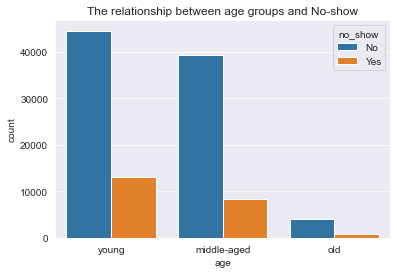

In [39]:
#countplot visualization using seaborn
ax = sns.countplot(x=age_bins, hue=no_show['no_show'])
ax.set_title('The relationship between age groups and No-show')
##x_tick_labels are not necessary here because our values represent labels for the 3 age groups
plt.show()

The chart above shows the counts for the different age groups, grouped by no-show.
There appears to be a weak correlation between age and no-show because the young age group had the highest proportion of patients that didn't show up for their appointments.

## Let's create simple functions to help us get proportions of our variables and plot them against the no_show column

In [40]:
#a function to get the proportions of patients that showed up and those that didn't
def variable_proportions(column, DataFrame):
    TotalValues_forEachCategory = DataFrame.groupby([column])['no_show'].count()
    valuesFor_Show_noShow = DataFrame.groupby([column, 'no_show'])['no_show'].count()
    proportions = valuesFor_Show_noShow / TotalValues_forEachCategory
    return proportions



In [41]:
#a function to plot the proportions against the no_show column
def proportions_plot(proportions, column_name, color1, color2, xLabel_1, xLabel_2, main_xlabel):
    # Proportions come from get_propotion function.
    proportions.unstack().plot(kind='bar', color=[color1, color2]);
    plt.ylabel('proprtion of patients')
    plt.xlabel(main_xlabel);
    plt.title(f'The relationship between {column_name} and no-show', fontsize=15, )
    plt.legend(labels=['Show', 'no-show'], fontsize=16 , bbox_to_anchor=(1.05, 0.7));
    plt.xticks([0, 1], [xLabel_1, xLabel_2], rotation=0);

### visualizing the correlation between the 'scholarship' and 'no_show' columns

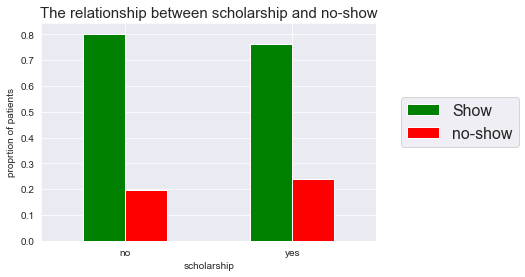

In [42]:
#getting the proportions
proportions = variable_proportions('scholarship', no_show)
#plotting
proportions_plot(proportions, 'scholarship', 'g', 'r', 'no', 'yes', 'scholarship')


The chart above shows the proportion of patients that did or didn't receive a scholarship, grouped by no-show. 
Patients who recieve scholarships tend to miss their appointments more than those who do not.

### visualizing any correlations between chronic medical status of patients and the 'no_show' column

In the next couple of cells, we will be plotting the various chronic medical conditions to show any correlations between them and patients not showing up for their appointments.

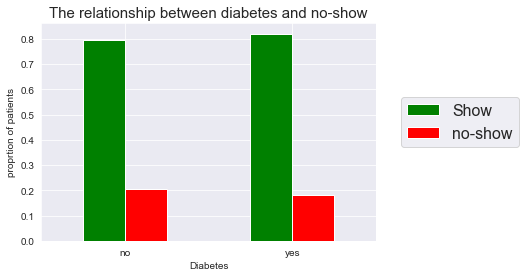

In [43]:
#diabetes and no-show
#getting the proportions
proportions = variable_proportions('diabetes', no_show)
#plotting
proportions_plot(proportions, 'diabetes', 'g', 'r', 'no', 'yes', 'Diabetes')


The chart above shows the proportion of patients with or without Diabetes, grouped by no-show. 
Diabetes doesn't appear to have any relationship with whether or not patients will show up for their appointments.

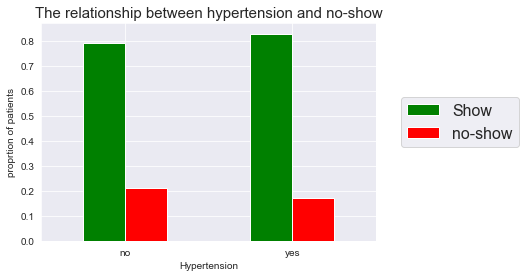

In [44]:
#hypertension and no-show
#getting the proportions
proportions = variable_proportions('hypertension', no_show)
#plotting
proportions_plot(proportions, 'hypertension', 'g', 'r', 'no', 'yes', 'Hypertension')


The chart above shows the proportion of patients with or without hypertension, grouped by no-show. 
Hypertension doesn't appear to have any relationship with whether or not patients will show up for their appointments.

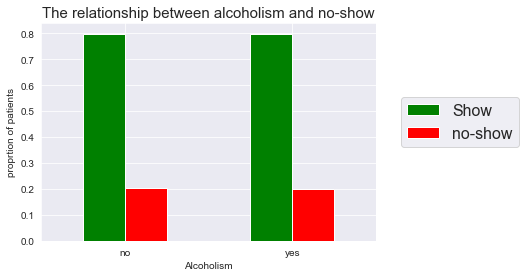

In [45]:
#alcoholism and no-show
#getting the proportions
proportions = variable_proportions('alcoholism', no_show)
#plotting
proportions_plot(proportions, 'alcoholism', 'g', 'r', 'no', 'yes', 'Alcoholism')

The chart above shows the proportion of patients with or without Alcoholism, grouped by no-show. 
Alcoholism doesn't appear to have any relationship with whether or not patients will show up for their appointments.

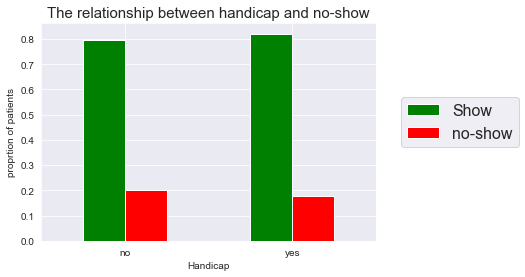

In [46]:
#handicap and no-show
#getting the proportions
proportions = variable_proportions('handicap', no_show)
#plotting
proportions_plot(proportions, 'handicap', 'g', 'r', 'no', 'yes', 'Handicap')

The chart above shows the proportion of handicap patients, grouped by no-show. There appears not to be any relationship with whether or not handicap patients will show up for their appointments.

There appears not to be any correlations between the medical conditions contained in this dataFrame and patients not showing up for their appointments.

<a id='conclusions'></a>
# Conclusion

***


Based on my investigation, there seems to be a correlation between scholarchips and patients showing up for their appointments. This may be due to the fact that they pay a commitment fee, or that the decision to schedule an appointment comes from a place of readiness to follow through with the appointment as opposed to being offered free healthcare.<br><br>
     Also, gender doesn't seem to have any correlations with no-show as the percentages of either males or females who showed up for their appointments were the same.<br><br>
     Chronic medical conditions don't seem to be good determinant factors in the prediction of no-show for patients because there weren't any relationships between the medical status of patients and them showing up for their appointments. <br><br>


### Limitations
The limitations of this dataset include but are not limited to:
* Not enough data to deduce strong predictions
    * The information contained in this dataset was not sufficient to make strong predictions as most relationships between variables only show weak correlations.
* Seemingly off age values
    * The age column had a negative value in one of the rows.
* Invalid categorical values in the handicap column
    * The handicap column had 5 unique values as opposed to 2.

* Improper documentation of the dates
    * 110499 out of 110527 rows had the same date, any attempt to make correlations between appointment dates and no-show would result in a biased analysis.
    